In [1]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:44<00:00, 23.3MB/s]
100% 2.29G/2.29G [01:44<00:00, 23.5MB/s]


In [2]:
from zipfile import *

zip_ref = ZipFile('chest-xray-pneumonia.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
pip install zipfile

ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile


In [5]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

# Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Part 2 - Fitting the CNN to the images

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

classifier.fit(training_set,
                         steps_per_epoch=500,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=125)


Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


156/500 ━━━━━━━━━━━━━━━━━━━━ 1:42 297ms/step - accuracy: 0.7869 - loss: 0.4409

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


500/500 ━━━━━━━━━━━━━━━━━━━━ 59s 104ms/step - accuracy: 0.8315 - loss: 0.3683 - val_accuracy: 0.8750 - val_loss: 0.3058
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 54s 104ms/step - accuracy: 0.9014 - loss: 0.2432 - val_accuracy: 0.7692 - val_loss: 0.5819
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.9188 - loss: 0.2007 - val_accuracy: 0.8862 - val_loss: 0.2744
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.9136 - loss: 0.2011 - val_accuracy: 0.8029 - val_loss: 0.6036
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 53s 102ms/step - accuracy: 0.9279 - loss: 0.1772 - val_accuracy: 0.8670 - val_loss: 0.3516
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 97ms/step - accuracy: 0.9330 - loss: 0.1622 - val_accuracy: 0.8702 - val_loss: 0.3608
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 52s 99ms/step - accuracy: 0.9357 - loss: 0.1564 - val_accuracy: 0.8606 - val_loss: 0.3708
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.9388 - loss: 0.1594 - val_acc

In [6]:
classifier.save('pneumonia_pred_new.h5')

In [10]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the Keras model
model = load_model("/content/pneumonia_pred_new.h5")

# Save the model in TensorFlow SavedModel format
tf.saved_model.save(model, "/content/medicalImageSeg/SavedModel")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
------------PREDICTION--------------

PNEUMONIA TEST RESULT :  POSITIVE
The probability of the test being POSITIVE is 99%
------------------------------------


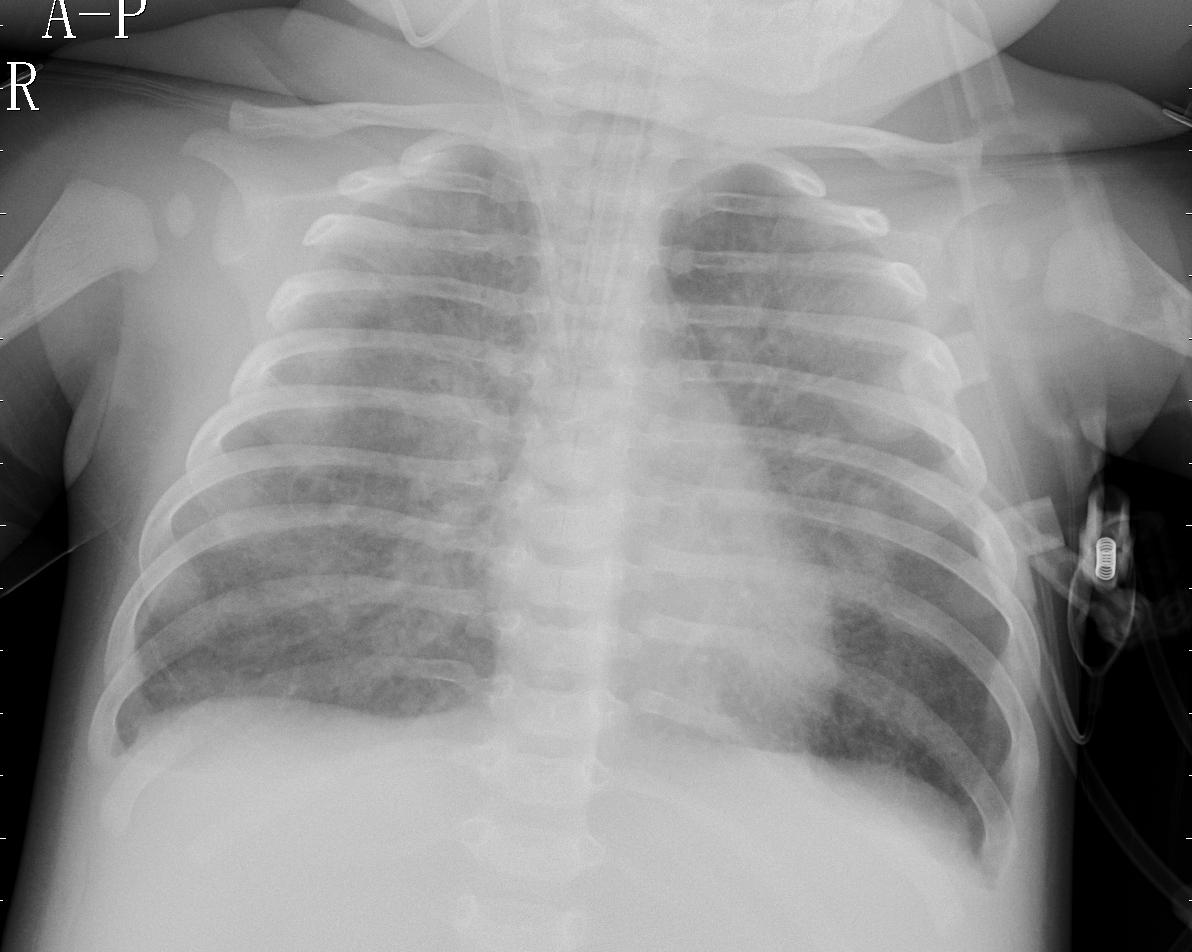

In [15]:
from keras.models import load_model
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the Keras model
model = load_model('/content/pneumonia_pred_new.h5')

# Load and preprocess the image
imageee = '/content/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg'
img = cv2.imread(imageee)
img = cv2.resize(img, (64, 64))
img = img.astype('float32') / 255.0  # Normalize pixel values
img = np.reshape(img, [1, 64, 64, 3])

# Predict using the model
predictions = model.predict(img)
class_prediction = (predictions > 0.5).astype("int32")  # Convert probabilities to class labels

# Determine class and probability
probabilities = predictions[0][0]
if class_prediction[0][0] == 1:
    pred = 'POSITIVE'
else:
    pred = 'NEGATIVE'
    probabilities = 1 - probabilities

# Display the result
print("------------PREDICTION--------------")
print()
print("PNEUMONIA TEST RESULT : ", pred)
print('The probability of the test being {} is {}%'.format(pred, int(probabilities * 100)))
print("------------------------------------")

# Show the image
cvimg = cv2.imread(imageee)
cv2_imshow(cvimg)


In [16]:
from google.colab import files

# Download the SavedModel directory as a zip file
import shutil
shutil.make_archive('/content/medicalImageSeg/SavedModel', 'zip', '/content/medicalImageSeg')

# Create a download link
files.download('/content/medicalImageSeg/SavedModel.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>